In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
df = pd.read_csv("/content/drive/MyDrive/student_clustering.csv")
print(df.head())
X = df.select_dtypes(include=['float64', 'int64'])



   cgpa   iq
0  5.13   88
1  5.90  113
2  8.36   93
3  8.27   97
4  5.45  110


In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


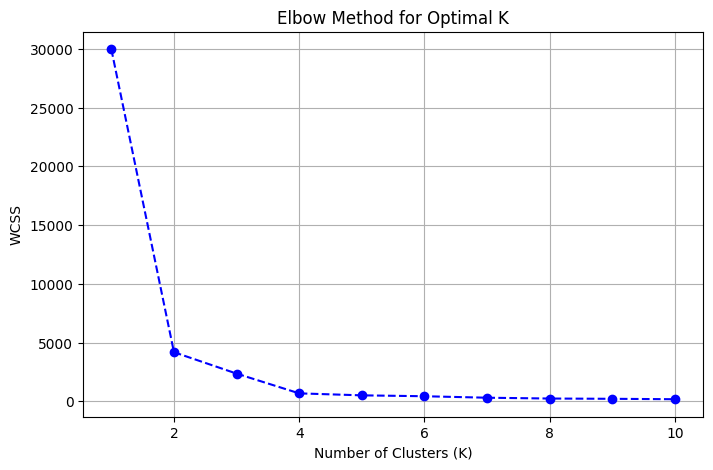

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [ ]:
kmeans_10 = KMeans(n_clusters=10, random_state=42)
y_pred = kmeans_10.fit_predict(X)
df['Cluster'] = y_pred
print(df.head())


   cgpa   iq  Cluster
0  5.13   88        1
1  5.90  113        7
2  8.36   93        6
3  8.27   97        3
4  5.45  110        0


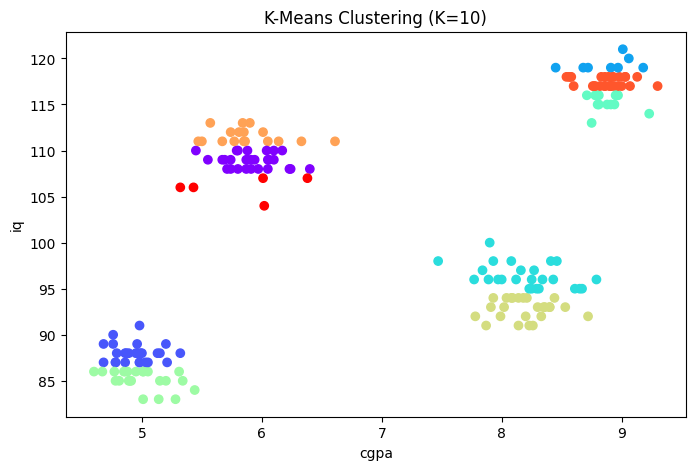

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_pred, cmap='rainbow')
plt.title('K-Means Clustering (K=10)')
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.show()


In [ ]:
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D
centers = [[2, 2, 2], [-2, -2, -2], [2, -2, 2], [-2, 2, -2], [0, 0, 0]]
cluster_std = 1.5
X3D, y3D = make_blobs(n_samples=200, n_features=3, centers=centers, cluster_std=cluster_std, random_state=42)
print("Centroids (Centers):", centers)
print("Cluster Standard Deviation:", cluster_std)

Centroids (Centers): [[2, 2, 2], [-2, -2, -2], [2, -2, 2], [-2, 2, -2], [0, 0, 0]]
Cluster Standard Deviation: 1.5


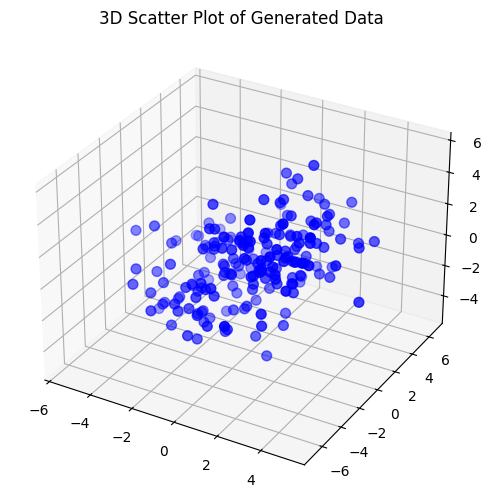

In [ ]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X3D[:, 0], X3D[:, 1], X3D[:, 2], s=50, color='blue')
ax.set_title('3D Scatter Plot of Generated Data')
plt.show()


In [ ]:
wcss_3d = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X3D)
    wcss_3d.append(kmeans.inertia_)


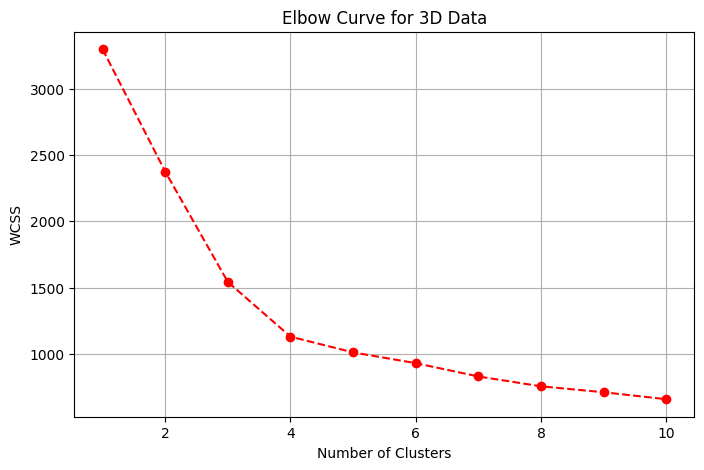

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss_3d, marker='o', linestyle='--', color='r')
plt.title('Elbow Curve for 3D Data')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


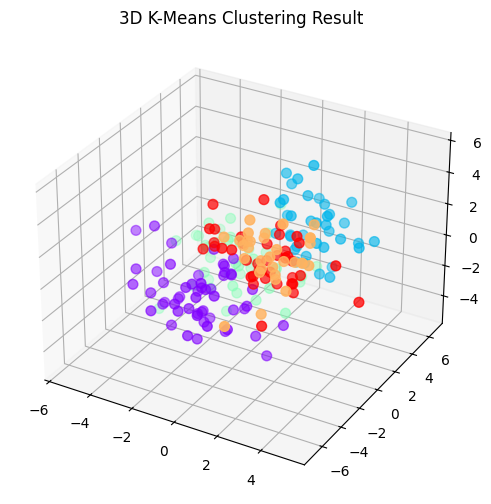

In [ ]:
kmeans_3d = KMeans(n_clusters=5, random_state=42)
y_pred_3d = kmeans_3d.fit_predict(X3D)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X3D[:, 0], X3D[:, 1], X3D[:, 2], c=y_pred_3d, cmap='rainbow', s=50)
ax.set_title('3D K-Means Clustering Result')
plt.show()
